# Source:
    
https://markroxor.github.io/gensim/static/notebooks/ldaseqmodel.html#topic=0&lambda=1&term=

### Setting up our imports

In [1]:
#from gensim.models import ldaseqmodel
from gensim.models import LdaModel
from gensim.test.utils import common_texts
from gensim.corpora import Dictionary, bleicorpus
import pandas as pd
BASE = 'C:\\Users\\basharm\\PythonJupyter\\CoVID19CodeGit\\data\\initial_data\\'

C:\Users\basharm\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Read data

In [2]:
df_in = pd.read_csv(BASE+'links_only_sorted_pp.csv', encoding = 'utf8')
#df_in = df_in.iloc[:10]
df_in.head(5)

,created_at,verified,name,full_text,location,followers_count,friends_count
0,2020-03-07 11:48:47+00:00,False,occhionotizie.it,lattacco del governatore,"Salerno, Campania",2647,81
1,2020-03-07 11:48:47+00:00,False,Pierre Beaudin M.Ed.,selfquarantine challenging may think good advi...,Canada,2806,4993
2,2020-03-07 11:48:47+00:00,False,GEGENPAPST,coronavirus gesundheitsministerium beschließt ...,WAHALLA,182,1095
3,2020-03-07 11:48:48+00:00,False,Lay Zhang Thailand,200307 youku weibo update layzhang บอสมาสอนทำค...,"Bangkok, Thailand",1299,48
4,2020-03-07 11:48:48+00:00,False,Chinese Tea Master,to people think ok joke sacrifice wuhancitizen...,Belgium,101,197


### Prepare Data

In [3]:
corpus = map(lambda x: x.split(), list(df_in['full_text']))

In [4]:
corpus = list(corpus)

In [5]:
corpus_dictionary = Dictionary(corpus)

In [6]:
#list(corpus_dictionary.items())

In [7]:
bow_corpus = [corpus_dictionary.doc2bow(text) for text in corpus]

In [8]:
#bow_corpus

### Train Model

In [9]:
#lda = LdaModel(bow_corpus, num_topics=10)
lda = LdaModel(corpus=bow_corpus, id2word=corpus_dictionary, num_topics=10)

### Save a model to disk, or reload a pre-trained model

In [10]:
from gensim.test.utils import datapath
temp_file = "model"
lda.save(temp_file)
lda = LdaModel.load(temp_file)

C:\Users\basharm\AppData\Local\Continuum\anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [11]:
lda.get_topic_terms(1,10)

[(63, 0.05288284),
 (14, 0.03702635),
 (53, 0.017977444),
 (197, 0.01397884),
 (624, 0.012954778),
 (259, 0.012472432),
 (336, 0.011465348),
 (62, 0.01066079),
 (605, 0.0088093635),
 (506, 0.008490001)]

In [35]:
lda.get_document_topics(bow_corpus[1])

[(0, 0.010000284),
 (1, 0.45697695),
 (2, 0.01000157),
 (3, 0.010000603),
 (4, 0.010000008),
 (5, 0.010000123),
 (7, 0.010000082),
 (8, 0.010000073),
 (9, 0.46302032)]

In [13]:
lda.print_topics(num_words=4)

[(0, '0.022*"coronavirus" + 0.021*"covid19" + 0.019*"le" + 0.018*"de"'),
 (1, '0.053*"-pron-" + 0.037*"coronavirus" + 0.018*"covid19" + 0.014*"be"'),
 (2, '0.078*"coronavirus" + 0.019*"via" + 0.016*"covid19" + 0.014*"outbreak"'),
 (3, '0.056*"coronavirus" + 0.041*"case" + 0.017*"covid19" + 0.016*"new"'),
 (4, '0.029*"covid19" + 0.016*"。" + 0.012*"sa" + 0.008*"️"'),
 (5, '0.045*"coronavirus" + 0.024*"di" + 0.012*"e" + 0.012*"per"'),
 (6, '0.066*"de" + 0.051*"el" + 0.048*"coronavirus" + 0.042*"en"'),
 (7, '0.019*"de" + 0.012*"caso" + 0.009*"coronavirus" + 0.009*"coronavírus"'),
 (8,
  '0.030*"covid2019" + 0.029*"coronavirusoutbreak" + 0.029*"coronavirus" + 0.023*"covid19"'),
 (9, '0.040*"coronavirus" + 0.012*"ted" + 0.011*"know" + 0.009*"hand"')]

In [45]:
all_doc_topics = []
for bow in bow_corpus:
    doc_topics = [0]*10
    dists = lda.get_document_topics(bow)
    for dist in dists:
        doc_topics[dist[0]] = dist[1]
    all_doc_topics.append(doc_topics)


In [51]:
all_doc_topics = np.array(all_doc_topics)

In [54]:
all_doc_topics = all_doc_topics.transpose()
all_doc_topics[0]

array([0.02500705, 0.01000028, 0.01111217, ..., 0.        , 0.10544534,
       0.        ])

In [14]:
## Plot
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
bin_size = int(len(all_doc_topics[0])/104)
bin_size

6078

In [105]:
topic_bins = []
for idx in range(10):
    bins = []
    sum_=0
    for i, val in enumerate(all_doc_topics[idx]):
        sum_+=val
        if i%bin_size==0:
            bins.append(sum_/bin_size)
            sum_=0
    topic_bins.append(bins)

Text(0, 0.5, 'Intensity')

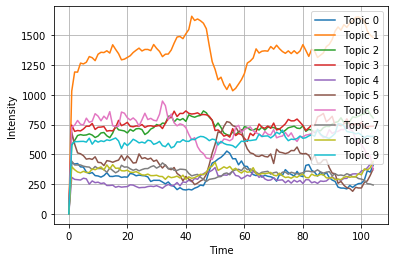

In [107]:
#plt.plot(range(len(all_doc_topics[0])), all_doc_topics[0])
plt.plot(range(len(topic_bins[0])), topic_bins[0])
plt.plot(range(len(topic_bins[0])), topic_bins[1])
plt.plot(range(len(topic_bins[0])), topic_bins[2])
plt.plot(range(len(topic_bins[0])), topic_bins[3])
plt.plot(range(len(topic_bins[0])), topic_bins[4])
plt.plot(range(len(topic_bins[0])), topic_bins[5])
plt.plot(range(len(topic_bins[0])), topic_bins[6])
plt.plot(range(len(topic_bins[0])), topic_bins[7])
plt.plot(range(len(topic_bins[0])), topic_bins[8])
plt.plot(range(len(topic_bins[0])), topic_bins[9])
plt.legend(['Topic '+str(x) for x in range(10)], loc='best')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Intensity')
#plt.show()

Text(0, 0.5, 'Intensity')

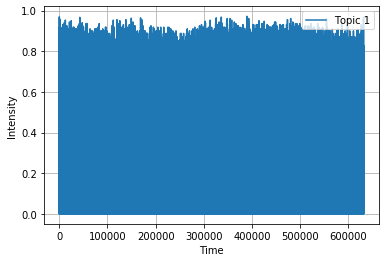

In [65]:
#plt.plot(range(len(all_doc_topics[0])), all_doc_topics[0])
plt.plot(range(len(all_doc_topics[1])), all_doc_topics[9])
plt.legend(['Topic 1', 'Topic 2'])
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Intensity')
#plt.show()

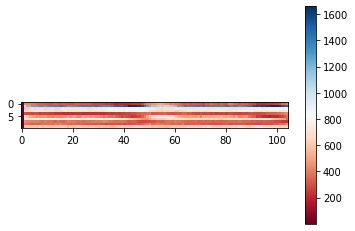

In [110]:
import numpy as np
a = np.random.random((20, 10))
plt.imshow(topic_bins, cmap='RdBu', interpolation='nearest')
plt.colorbar()
plt.show()

In [46]:
a

array([[0.84078282, 0.02863675, 0.83084149, 0.71640144, 0.42919998,
        0.81692515, 0.8855945 , 0.27073994, 0.33818339, 0.55861337],
       [0.4349686 , 0.76799145, 0.95620354, 0.56822812, 0.88214463,
        0.40127787, 0.80377066, 0.9379778 , 0.99801782, 0.12565488],
       [0.12592867, 0.35690866, 0.16078802, 0.69776472, 0.15070052,
        0.98207484, 0.77830692, 0.84059091, 0.39552739, 0.67321268],
       [0.11051294, 0.62115428, 0.99377474, 0.6738963 , 0.09536661,
        0.5445395 , 0.36254158, 0.50648903, 0.45913306, 0.14226701],
       [0.22898999, 0.54945521, 0.24860779, 0.402351  , 0.95285489,
        0.02545708, 0.17200247, 0.69626717, 0.61809971, 0.6028618 ],
       [0.45759169, 0.91633093, 0.4495903 , 0.73576128, 0.84974734,
        0.27470341, 0.33144222, 0.67368234, 0.76640498, 0.47504499],
       [0.16893128, 0.44571263, 0.88644197, 0.97464537, 0.87943791,
        0.56768874, 0.46622755, 0.86701504, 0.22983402, 0.11791324],
       [0.99078675, 0.30608215, 0.3982233